# Import **Modules**

In [246]:
from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas

clear_output()

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

PALETTE=['lightcoral', 'lightskyblue', 'gold', 'sandybrown', 'navajowhite',
        'khaki', 'lightslategrey', 'turquoise', 'rosybrown', 'thistle', 'pink']
sns.set_palette(PALETTE)
BACKCOLOR = '#f6f5f5'

from IPython.core.display import HTML

# **User Modules**

In [248]:
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [249]:
def cat_dist(data, var, hue, msg_show=True):
    total_cnt = data[var].count()
    f, ax = plt.subplots(1, 2, figsize=(25, 8))
    hues = [None, hue]
    titles = [f"{var}'s distribution", f"{var}'s distribution by {hue}"]

    for i in range(2):
        sns.countplot(data[var], edgecolor='black', hue=hues[i], linewidth=1, ax=ax[i], data=data)
        ax[i].set_xlabel(var, weight='bold', size=13)
        ax[i].set_ylabel('Count', weight='bold', size=13)
        ax[i].set_facecolor(BACKCOLOR)
        ax[i].spines[['top', 'right']].set_visible(False)
        ax[i].set_title(titles[i], size=15, weight='bold')
        for patch in ax[i].patches:
            x, height, width = patch.get_x(), patch.get_height(), patch.get_width()
            if msg_show:
                ax[i].text(x + width / 2, height + 3, f'{height} \n({height / total_cnt * 100:2.2f}%)', va='center', ha='center', size=12, bbox={'facecolor': 'white', 'boxstyle': 'round'})
    plt.show()

In [250]:
def continuous_dist(data, x, y):
    f, ax = plt.subplots(1, 4, figsize=(35, 10))
    sns.histplot(data=train, x=y, hue=x, ax=ax[0], element='step')
    sns.violinplot(x=data[x], y=data[y], ax=ax[1], edgecolor='black', linewidth=1)
    sns.boxplot(x=data[x], y=data[y], ax=ax[2])
    sns.stripplot(x=data[x], y=data[y], ax=ax[3])
    for i in range(4):
        ax[i].spines[['top','right']].set_visible(False)
        ax[i].set_xlabel(x, weight='bold', size=20)
        ax[i].set_ylabel(y, weight='bold', size=20)
        ax[i].set_facecolor(BACKCOLOR)
    f.suptitle(f"{y}'s distribution by {x}", weight='bold', size=25)
    plt.show()

# **Read Data**

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [253]:
df = pd.read_csv("df_Traffic_fatalities.csv")

# EDA - Exploratory Data Analysis

## 1. Check Data

In [254]:
df.describe()

,county,city,national_highway_system,functional_system,ownership,route_signing,latitude,longitude,first_harmful_event,relation_to_junction_specific_location,relation_to_trafficway,light_condition,atmospheric_conditions,minute_of_arrival_at_scene,minute_of_ems_arrival_at_hospital,number_of_fatalities,number_of_drunk_drivers,TimeKey
count,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000,67286.000000
mean,91.307672,1210.040320,0.397408,4.470990,21.110365,3.598178,36.788546,-88.120472,18.015828,2.175326,2.363657,1.888952,5.488541,64.790729,75.158815,1.089231,0.283298,677.575736
std,95.222982,1889.209711,0.641686,7.653044,37.802285,1.828083,6.464762,69.078618,14.078029,4.914855,4.390422,1.134961,16.569938,36.565283,31.070065,0.362348,0.468266,341.047796
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,19.101319,-174.204181,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000
25%,31.000000,0.000000,0.000000,3.000000,1.000000,2.000000,33.085402,-98.168444,8.000000,1.000000,1.000000,1.000000,1.000000,30.000000,51.000000,1.000000,0.000000,401.000000
50%,71.000000,0.000000,0.000000,4.000000,1.000000,3.000000,36.285669,-87.843906,12.000000,1.000000,1.000000,2.000000,1.000000,88.000000,88.000000,1.000000,0.000000,656.000000
75%,115.000000,1980.000000,1.000000,5.000000,4.000000,5.000000,40.553673,-81.443132,30.000000,2.000000,4.000000,2.000000,2.000000,99.000000,99.000000,1.000000,1.000000,951.000000
max,999.000000,9999.000000,9.000000,99.000000,99.000000,9.000000,99.999900,999.999900,99.000000,99.000000,99.000000,9.000000,99.000000,99.000000,99.000000,13.000000,3.000000,1259.000000


In [255]:
df.head(10).style.background_gradient()

,state_name,county,city,national_highway_system,land_use_name,functional_system,functional_system_name,ownership,ownership_name,route_signing,route_signing_name,trafficway_identifier,latitude,longitude,first_harmful_event,first_harmful_event_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway,relation_to_trafficway_name,light_condition,light_condition_name,atmospheric_conditions,atmospheric_conditions_name,school_bus_related,minute_of_arrival_at_scene,minute_of_ems_arrival_at_hospital,number_of_fatalities,number_of_drunk_drivers,Date,TimeKey
0,Arizona,25,0,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-10,34.700831,-111.743361,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,None,1,On Roadway,1,Daylight,1,Clear,No,32,54,1,0,19-Jun-2016,1214
1,Arkansas,45,0,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-40-32,35.121403,-92.493156,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,None,1,On Roadway,1,Daylight,1,Clear,No,18,99,1,0,13-May-2016,608
2,Arkansas,123,0,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-40-510,34.990481,-90.888811,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,None,1,On Roadway,1,Daylight,1,Clear,No,2,54,1,0,30-Dec-2016,440
3,Florida,105,1690,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-4,28.165417,-81.777650,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,None,1,On Roadway,1,Daylight,1,Clear,No,99,99,4,0,21-Jun-2016,755
4,Georgia,103,0,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-16,32.121367,-81.382025,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,None,1,On Roadway,2,Dark – Not Lighted,1,Clear,No,29,32,1,1,12-Jan-2016,1017
5,Georgia,287,250,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-75,31.714919,-83.638350,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,None,1,On Roadway,2,Dark – Not Lighted,1,Clear,No,98,88,1,0,20-Apr-2016,319
6,Illinois,107,0,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-55,40.247086,-89.246847,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,Construction,1,On Roadway,1,Daylight,1,Clear,No,99,99,2,0,31-Jul-2016,302
7,Illinois,99,0,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-80,41.375697,-88.766589,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,Construction,1,On Roadway,1,Daylight,1,Clear,No,99,99,3,0,01-Aug-2016,111
8,Louisiana,119,0,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-20,32.584097,-93.376831,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,Construction,1,On Roadway,1,Daylight,1,Clear,No,32,26,1,0,31-Aug-2016,528
9,Louisiana,95,0,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-10,30.111164,-90.543239,12,Motor Vehicle in Transport,No,1,Non-Junction,Not an Intersection,None,1,On Roadway,1,Daylight,1,Clear,No,53,37,3,0,28-Aug-2016,717


In [256]:


df1 = df.drop(['county','city','functional_system','ownership','route_signing','national_highway_system','first_harmful_event', 'relation_to_junction_specific_location' ,'light_condition' , 'atmospheric_conditions', 'minute_of_arrival_at_scene',	'minute_of_ems_arrival_at_hospital', 'TimeKey'], axis=1)

In [257]:
print(f'\033[before size: {df.shape[0]} x {df.shape[1]}')
print(f'\033[after size : {df1.shape[0]} x {df1.shape[1]}')

efore size: 67286 x 34
fter size : 67286 x 21


In [258]:
df = df1

In [259]:
df.head(10).style.background_gradient()

,state_name,land_use_name,functional_system_name,ownership_name,route_signing_name,trafficway_identifier,latitude,longitude,first_harmful_event_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway,relation_to_trafficway_name,light_condition_name,atmospheric_conditions_name,school_bus_related,number_of_fatalities,number_of_drunk_drivers,Date
0,Arizona,Rural,Interstate,State Highway Agency,Interstate,I-10,34.700831,-111.743361,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,None,1,On Roadway,Daylight,Clear,No,1,0,19-Jun-2016
1,Arkansas,Rural,Interstate,State Highway Agency,Interstate,I-40-32,35.121403,-92.493156,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,None,1,On Roadway,Daylight,Clear,No,1,0,13-May-2016
2,Arkansas,Rural,Interstate,State Highway Agency,Interstate,I-40-510,34.990481,-90.888811,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,None,1,On Roadway,Daylight,Clear,No,1,0,30-Dec-2016
3,Florida,Rural,Interstate,State Highway Agency,Interstate,I-4,28.165417,-81.777650,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,None,1,On Roadway,Daylight,Clear,No,4,0,21-Jun-2016
4,Georgia,Rural,Interstate,State Highway Agency,Interstate,I-16,32.121367,-81.382025,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,None,1,On Roadway,Dark – Not Lighted,Clear,No,1,1,12-Jan-2016
5,Georgia,Rural,Interstate,State Highway Agency,Interstate,I-75,31.714919,-83.638350,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,None,1,On Roadway,Dark – Not Lighted,Clear,No,1,0,20-Apr-2016
6,Illinois,Rural,Interstate,State Highway Agency,Interstate,I-55,40.247086,-89.246847,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,Construction,1,On Roadway,Daylight,Clear,No,2,0,31-Jul-2016
7,Illinois,Rural,Interstate,State Highway Agency,Interstate,I-80,41.375697,-88.766589,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,Construction,1,On Roadway,Daylight,Clear,No,3,0,01-Aug-2016
8,Louisiana,Rural,Interstate,State Highway Agency,Interstate,I-20,32.584097,-93.376831,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,Construction,1,On Roadway,Daylight,Clear,No,1,0,31-Aug-2016
9,Louisiana,Rural,Interstate,State Highway Agency,Interstate,I-10,30.111164,-90.543239,Motor Vehicle in Transport,No,Non-Junction,Not an Intersection,None,1,On Roadway,Daylight,Clear,No,3,0,28-Aug-2016


In [260]:
df.columns

Index(['state_name', 'land_use_name', 'functional_system_name',
       'ownership_name', 'route_signing_name', 'trafficway_identifier',
       'latitude', 'longitude', 'first_harmful_event_name',
       'relation_to_junction_within_interchange_area',
       'relation_to_junction_specific_location_name', 'type_of_intersection',
       'work_zone', 'relation_to_trafficway', 'relation_to_trafficway_name',
       'light_condition_name', 'atmospheric_conditions_name',
       'school_bus_related', 'number_of_fatalities', 'number_of_drunk_drivers',
       'Date'],
      dtype='object')

In [261]:
df.dtypes

state_name                                       object
land_use_name                                    object
functional_system_name                           object
ownership_name                                   object
route_signing_name                               object
trafficway_identifier                            object
latitude                                        float64
longitude                                       float64
first_harmful_event_name                         object
relation_to_junction_within_interchange_area     object
relation_to_junction_specific_location_name      object
type_of_intersection                             object
work_zone                                        object
relation_to_trafficway                            int64
relation_to_trafficway_name                      object
light_condition_name                             object
atmospheric_conditions_name                      object
school_bus_related                              

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67286 entries, 0 to 67285
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   state_name                                    67286 non-null  object 
 1   land_use_name                                 67286 non-null  object 
 2   functional_system_name                        67286 non-null  object 
 3   ownership_name                                67286 non-null  object 
 4   route_signing_name                            67286 non-null  object 
 5   trafficway_identifier                         67286 non-null  object 
 6   latitude                                      67286 non-null  float64
 7   longitude                                     67286 non-null  float64
 8   first_harmful_event_name                      67286 non-null  object 
 9   relation_to_junction_within_interchange_area  67286 non-null 

##2.Missing Value

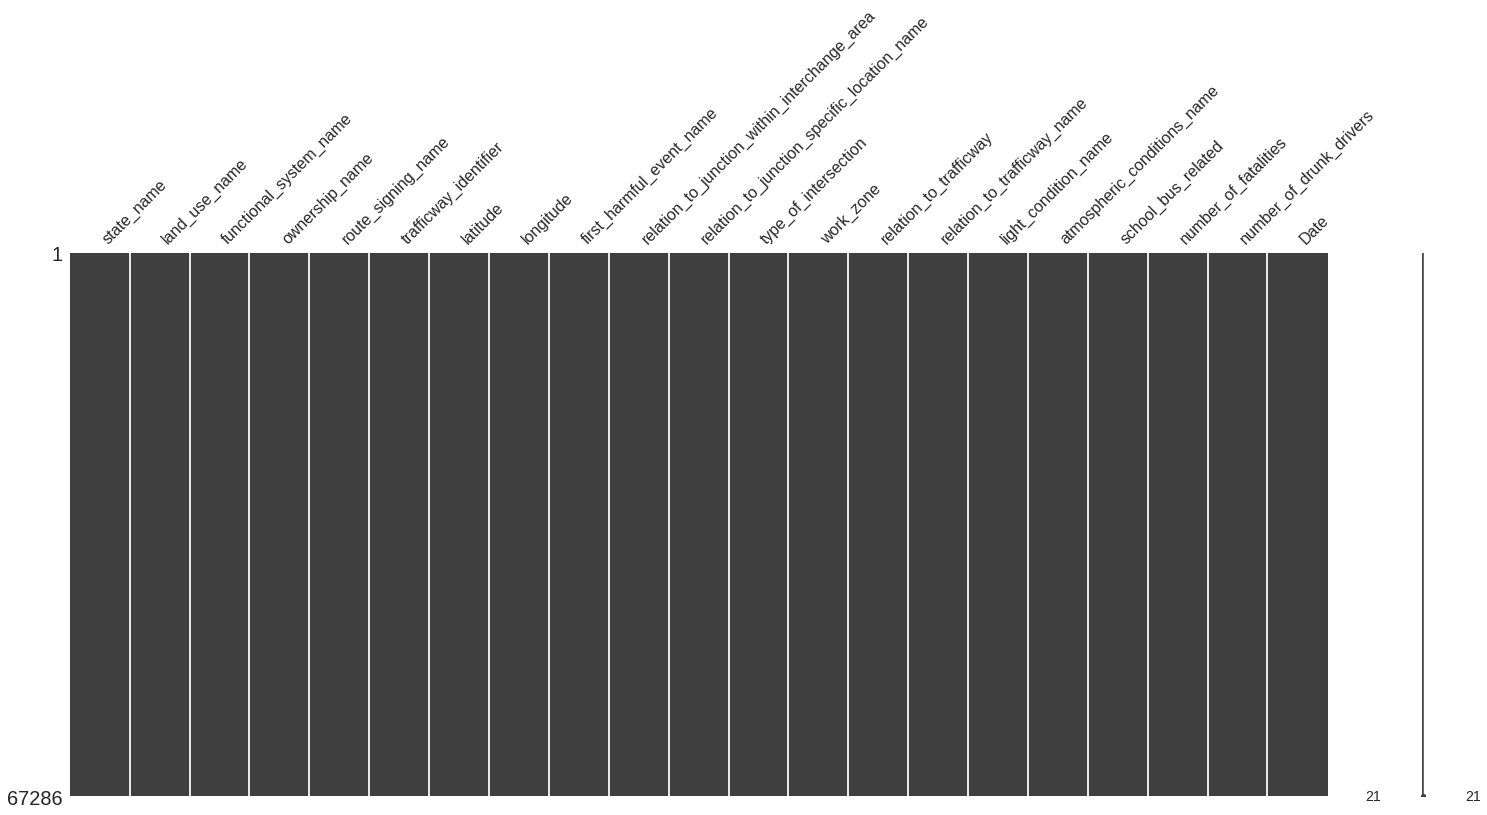

In [263]:
msno.matrix(df)

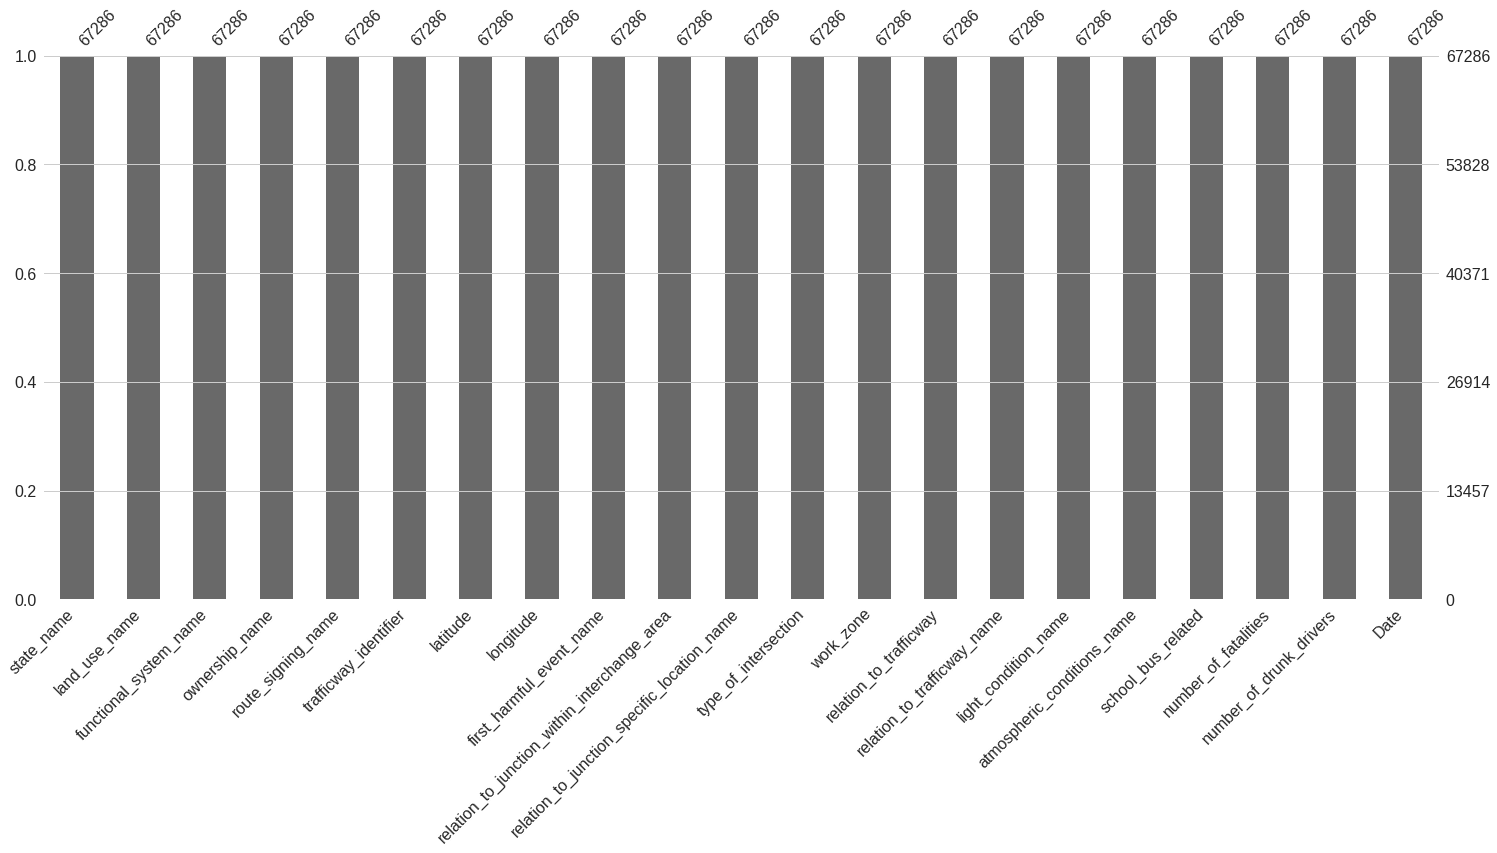

In [264]:
msno.bar(df)

In [265]:
df.isnull().sum()

state_name                                      0
land_use_name                                   0
functional_system_name                          0
ownership_name                                  0
route_signing_name                              0
trafficway_identifier                           0
latitude                                        0
longitude                                       0
first_harmful_event_name                        0
relation_to_junction_within_interchange_area    0
relation_to_junction_specific_location_name     0
type_of_intersection                            0
work_zone                                       0
relation_to_trafficway                          0
relation_to_trafficway_name                     0
light_condition_name                            0
atmospheric_conditions_name                     0
school_bus_related                              0
number_of_fatalities                            0
number_of_drunk_drivers                         0


## 3. Detail Explore
Explore in detail for each variable



In [267]:
#descriptive statistics summary
df['number_of_fatalities'].describe()

count    67286.000000
mean         1.089231
std          0.362348
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: number_of_fatalities, dtype: float64

### state_name (Nominal)

In [283]:
Sum_Ofatalitiesby_land_use_name =  df.groupby(['land_use_name'])['number_of_fatalities'].sum()

land_use_name
Not Reported                            13
Rural                                36036
Trafficway Not in State Inventory      271
Unknown                                 40
Urban                                36930
Name: number_of_fatalities, dtype: int64

In [287]:
 pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=810246ee0237fd895da2e1ee469d4f6e018a845c10fc671aef92c24d77358fa2
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [294]:
# pip install pandasql
# from pandasql import sqldf
sqldf("""
SELECT
 land_use_name, 
 sum(number_of_fatalities) AS Total
FROM df 
GROUP BY land_use_name
""")

,land_use_name,Total
0,Not Reported,13
1,Rural,36036
2,Trafficway Not in State Inventory,271
3,Unknown,40
4,Urban,36930


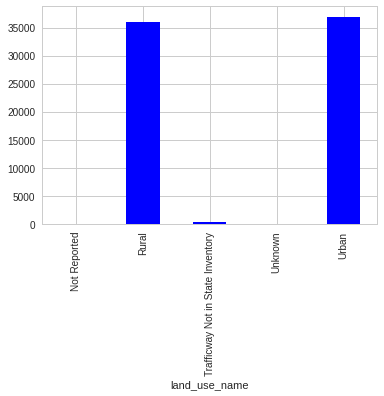

In [302]:
df.groupby('land_use_name').number_of_fatalities.sum().plot(kind = 'bar', color = 'blue')

In [317]:
 SumOF_fatalitiesby_land_use_name= df.groupby('land_use_name').number_of_fatalities.sum()
SumOF_fatalitiesby_land_use_name

land_use_name
Not Reported                            13
Rural                                36036
Trafficway Not in State Inventory      271
Unknown                                 40
Urban                                36930
Name: number_of_fatalities, dtype: int64

<BarContainer object of 5 artists>

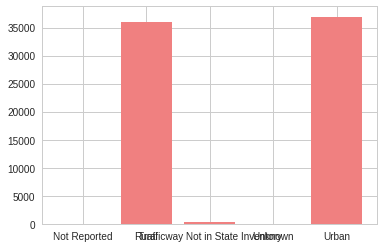

In [323]:
 sums  = SumOF_fatalitiesby_land_use_name.values
 land_use_name = SumOF_fatalitiesby_land_use_name.index


 fig , ax = plt.subplots()


 ax.bar(land_use_name, sums )
 

Index(['Not Reported', 'Rural', 'Trafficway Not in State Inventory', 'Unknown',
       'Urban'],
      dtype='object', name='land_use_name')